## Name:Xinlin Ying 
## NUID:001535622
## Import necessary library 

In [1]:
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_auc_score, accuracy_score
from google.colab import drive
from keras.optimizers import RMSprop
from keras.optimizers import Adadelta

/Users/ava/opt/conda/envs/tf/lib/python3.8/site-packages/google/colab/data_table.py:30: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  from IPython.utils import traitlets as _traitlets


### Import dataset
the dataset file is too big too upload. Please download the cvs file from https://www.kaggle.com/datasets/nikbearbrown/tmnist-alphabet-94-characters

In [2]:
df = pd.read_csv('94_character_TMNIST.csv')
df.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.shape

(274093, 786)

In [4]:
#getting total number of unique classes present in the dataframe
num_classes=df['labels'].nunique()
print('Total number of classes are ',num_classes)
#printing all the unique classes
print(df['labels'].unique())
#getting the total number of font types present in the data
num_font=df['names'].nunique()
print('The total number of different type of fonts present are -',num_font)

Total number of classes are  94
['6' 'D' 'f' '/' 'F' 'x' 'J' '8' 'H' 'k' '@' '1' '=' 'g' ')' '2' 'd' '^'
 '3' 't' '#' '.' '4' 'o' '"' 'y' 'A' 'u' 'G' '-' 'm' 'W' '&' 'c' '9' 'N'
 ']' 'P' 'X' '|' '}' 'h' '7' 'j' '5' '>' '?' 'b' '*' 'w' 'l' '0' '$' 'I'
 'Y' '%' ':' 'T' 'K' 'E' '<' 'V' '{' 'M' 'S' 'a' 'i' 'r' "'" 'p' ';' '['
 '+' 'e' 'U' '(' 's' '~' ',' 'C' 'q' '_' 'n' 'B' 'z' 'v' 'O' 'R' '`' 'Z'
 'Q' 'L' '!' '\\']
The total number of different type of fonts present are - 2990


In [5]:
num_unique_chars = len(df.labels.unique())
print(f"Number of unique character present in the Dataset: {num_unique_chars}")

Number of unique character present in the Dataset: 94


In [6]:
#Drop redundant coloums (names and labels), retain only pixel values
x = df.drop(columns=['names','labels']).values
y = df[['labels']].values
#Convert NumPy array to Pandas Dataframe for ease of processing downstream and triaging
df_x = pd.DataFrame(x)
df_y = pd.DataFrame(y)

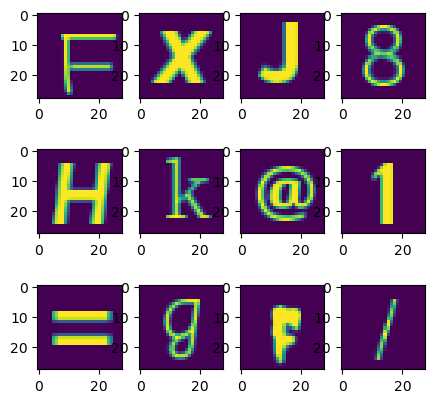

In [7]:
# sample reshaped characters of the dataset
x_images = x.reshape(-1,28,28)
fig,axs = plt.subplots(3,4,figsize=(5,5))
for i in range(2,14):
    r=i//4-1
    c=i%4
    axs[r][c].imshow(x_images[i])
plt.show()

### Set model's basic parameter

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2)

In [9]:
#Shape of training Data
print(f'X:Train, Test data shape:{X_train.shape},{X_test.shape}')
print(f'Y:Train, Test data shape:{y_train.shape},{y_test.shape}')

X:Train, Test data shape:(219274, 784),(54819, 784)
Y:Train, Test data shape:(219274, 1),(54819, 1)


In [10]:
#the pixel values are from 0-255, normalizing the dataset for neural network models, converting them to values between 0-1 
X_train= (X_train.astype('float32'))/255.0
X_test = (X_test.astype('float32'))/255.0
#encoding the y values
char_enc = OneHotEncoder(sparse=False,handle_unknown='ignore')
y_train_encoded= char_enc.fit_transform(y_train.values.reshape(-1,1))
y_test_encoded=  char_enc.transform(y_test.values.reshape(-1,1))

X_train_norm=X_train.values.reshape(X_train.shape[0],28,28)
X_test_norm=X_test.values.reshape(X_test.shape[0],28,28)

In [11]:
X_train_norm

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

### Define a function for plot result

In [12]:
def PlotResult(e):
    plt.figure(figsize=(10, 3))
    plt.subplot(1,2,1)
    epochs=np.arange(e)
    plt.title('Accuracy with different Epochs')
    plt.plot(epochs,model_history.history['accuracy'],label='train',color = 'red')
    plt.ylabel('Accuracy')
    plt.plot(epochs,model_history.history['val_accuracy'],label='test',color = 'green')
    plt.legend()
    plt.subplot(1,2,2)
    plt.title('Loss with different Epochs')
    plt.plot(epochs,model_history.history['loss'],label='train',color = 'red')
    plt.ylabel('Loss')
    plt.plot(epochs,model_history.history['val_loss'],label='test',color = 'green')
    plt.legend()
    plt.show()

### PART A - DEEP LEARNING MODEL (40 POINTS)

Find an image dataset. It cannot be MNIST or CFFAR but can be TMNIST. For TMNIST-Alphabet (94 characters and over 281,000 images) see https://www.kaggle.com/nikbearbrown/tmnist-alphabet-94-charactersLinks to an external site.

Activation Function: Softmax  
Cost Function: Categorical Cross Entropy  
Epochs length: 20  
Gradient Estimation: Adam  
Network Initialization: Glorot Uniform  

In [13]:
#ModelDefinition
model = Sequential()
#model.add(Conv2D(128,(5,5)))
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_unique_chars, activation='softmax'))
opt = Adam()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Metal device set to: Apple M1 Pro
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 94)                3102      
                                                                 
Total params: 474,814
Trainable params: 474,814
Non-trainable params: 0
_________________________________________________________________


2022-11-20 18:56:03.753934: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-20 18:56:03.754060: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [14]:
#Fitting the basic model
model_history=model.fit(X_train_norm, y_train_encoded, epochs=20, validation_data=(X_test_norm, y_test_encoded), verbose=2,batch_size=128)

Epoch 1/20


2022-11-20 18:56:04.293049: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-20 18:56:04.499421: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-20 18:56:17.001783: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1714/1714 - 15s - loss: 0.8162 - accuracy: 0.7844 - val_loss: 0.5174 - val_accuracy: 0.8460 - 15s/epoch - 9ms/step
Epoch 2/20
1714/1714 - 15s - loss: 0.4387 - accuracy: 0.8645 - val_loss: 0.4360 - val_accuracy: 0.8654 - 15s/epoch - 9ms/step
Epoch 3/20
1714/1714 - 15s - loss: 0.3703 - accuracy: 0.8803 - val_loss: 0.3827 - val_accuracy: 0.8816 - 15s/epoch - 9ms/step
Epoch 4/20
1714/1714 - 15s - loss: 0.3279 - accuracy: 0.8906 - val_loss: 0.3765 - val_accuracy: 0.8806 - 15s/epoch - 8ms/step
Epoch 5/20
1714/1714 - 15s - loss: 0.2953 - accuracy: 0.9002 - val_loss: 0.3485 - val_accuracy: 0.8919 - 15s/epoch - 9ms/step
Epoch 6/20
1714/1714 - 15s - loss: 0.2678 - accuracy: 0.9082 - val_loss: 0.3335 - val_accuracy: 0.8945 - 15s/epoch - 9ms/step
Epoch 7/20
1714/1714 - 15s - loss: 0.2460 - accuracy: 0.9150 - val_loss: 0.3336 - val_accuracy: 0.8974 - 15s/epoch - 9ms/step
Epoch 8/20
1714/1714 - 15s - loss: 0.2285 - accuracy: 0.9202 - val_loss: 0.3452 - val_accuracy: 0.8984 - 15s/epoch - 8ms/step
Epo

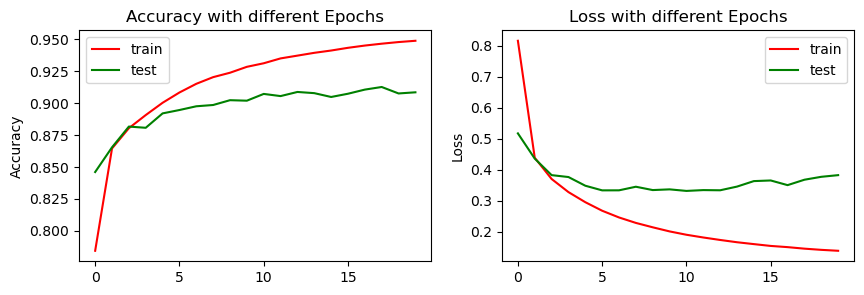

In [15]:
#Plotting Results
PlotResult(20)

### As the epochs grows, the error become large, but the error is in a bearable range between 5-10

### PART B - ACTIVATION FUNCTION (10 POINTS)

On your Deep Learning model data
Change the activation function. How does it affect accuracy? How does it affect how quickly the network plateaus?

Various activation functions:  

Rectified linear unit (ReLU)
TanH
Leaky rectified linear unit (Leaky ReLU)
Parameteric rectified linear unit (PReLU) Randomized leaky rectified linear unit (RReLU)
Exponential linear unit (ELU)
Scaled exponential linear unit (SELU)
S-shaped rectified linear activation unit (SReLU)
Adaptive piecewise linear (APL)

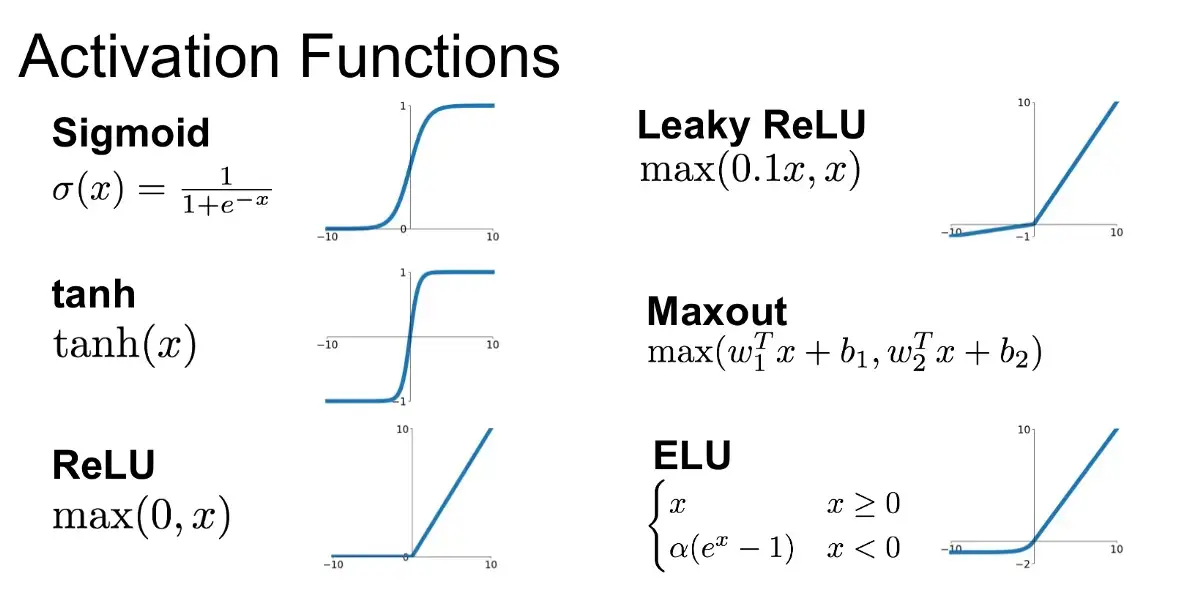
The ReLU is the most used activation function in the world right now.Since, it is used in almost all the convolutional neural networks or deep learning.

But the issue is that all the negative values become zero immediately which decreases the ability of the model to fit or train from the data properly. That means any negative input given to the ReLU activation function turns the value into zero immediately in the graph, which in turns affects the resulting graph by not mapping the negative values appropriately.

In [16]:
#ModelDefinition
model = Sequential()
#model.add(Conv2D(128,(5,5)))
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512,activation='elu'))
model.add(Dense(128,activation='elu'))
model.add(Dense(32, activation='elu'))
model.add(Dense(num_unique_chars, activation='softmax'))
opt = Adam()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 128)               65664     
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 94)                3102      
                                                                 
Total params: 474,814
Trainable params: 474,814
Non-trainable params: 0
_________________________________________________________________


In [17]:
model_history=model.fit(X_train_norm, y_train_encoded, epochs=20, validation_data=(X_test_norm, y_test_encoded), verbose=2,batch_size=128)

Epoch 1/20


2022-11-20 19:00:58.893442: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-20 19:01:19.928068: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1714/1714 - 25s - loss: 0.7817 - accuracy: 0.7917 - val_loss: 0.5086 - val_accuracy: 0.8528 - 25s/epoch - 14ms/step
Epoch 2/20
1714/1714 - 26s - loss: 0.4545 - accuracy: 0.8611 - val_loss: 0.4304 - val_accuracy: 0.8677 - 26s/epoch - 15ms/step
Epoch 3/20
1714/1714 - 24s - loss: 0.3881 - accuracy: 0.8786 - val_loss: 0.4007 - val_accuracy: 0.8758 - 24s/epoch - 14ms/step
Epoch 4/20
1714/1714 - 25s - loss: 0.3447 - accuracy: 0.8905 - val_loss: 0.3748 - val_accuracy: 0.8851 - 25s/epoch - 14ms/step
Epoch 5/20
1714/1714 - 24s - loss: 0.3141 - accuracy: 0.8985 - val_loss: 0.3717 - val_accuracy: 0.8844 - 24s/epoch - 14ms/step
Epoch 6/20
1714/1714 - 24s - loss: 0.2880 - accuracy: 0.9057 - val_loss: 0.3469 - val_accuracy: 0.8935 - 24s/epoch - 14ms/step
Epoch 7/20
1714/1714 - 25s - loss: 0.2669 - accuracy: 0.9119 - val_loss: 0.3273 - val_accuracy: 0.9001 - 25s/epoch - 15ms/step
Epoch 8/20
1714/1714 - 24s - loss: 0.2499 - accuracy: 0.9167 - val_loss: 0.3311 - val_accuracy: 0.9001 - 24s/epoch - 14ms/

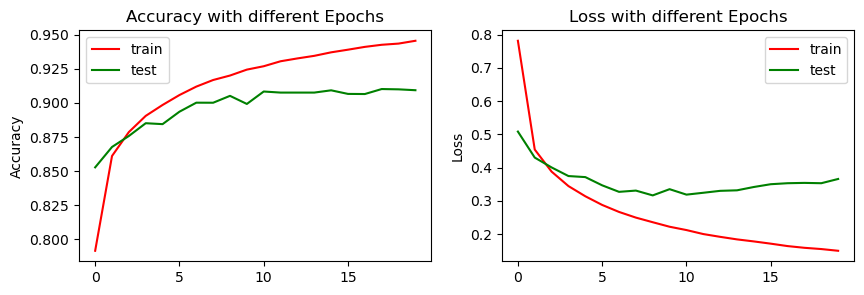

In [18]:
PlotResult(20)

### we change the activation function from relu to elu. The training result is more close to the real one give us a better prediction. But the training time is long than the relu, as relu one is 25 seconds per epochs and elu is 15 seconds per epochs.

### Part C  - COST FUNCTION (10 POINTS)  On your Deep Learning model.  

Change the cost function. How does it affect accuracy? How does it affect how quickly the network plateaus?
Various forms of cost: Quadratic cost (mean-square error)
Cross-Entropy
Hinge
Kullback–Leibler divergence
Cosine Proximity
User-defined
And many more, see https://keras.io/losses/

Cross entropy loss is used in classification tasks where we are trying to minimize the probability of a negative class by maximizing an expected value of some function on our training data, also called as “loss function”. Simply speaking, it is used to measure the difference between two probabilities that a model assigns to classes.

Mean squared error (MSE) loss is calculated by taking the difference between y and our prediction, then square those values. We take these new numbers (square them), add all of that together to get a final value, finally divide this number by y again. This will be our final result.  
In this section, we will experiment with a cost functions other than categorical crossentropy like Quadratic cost (mean-square error)

In [43]:
#ModelDefinition
model = Sequential()
#model.add(Conv2D(128,(5,5)))
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_unique_chars, activation='softmax'))
opt = Adam()
model.compile(optimizer=opt, loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_35 (Dense)            (None, 512)               401920    
                                                                 
 dense_36 (Dense)            (None, 128)               65664     
                                                                 
 dense_37 (Dense)            (None, 32)                4128      
                                                                 
 dense_38 (Dense)            (None, 94)                3102      
                                                                 
Total params: 474,814
Trainable params: 474,814
Non-trainable params: 0
_________________________________________________________________


In [44]:
model_history=model.fit(X_train_norm, y_train_encoded, epochs=20, validation_data=(X_test_norm, y_test_encoded), verbose=2,batch_size=128)

Epoch 1/20


2022-11-20 21:23:50.178615: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-20 21:23:59.058379: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1714/1714 - 11s - loss: 0.0041 - accuracy: 0.7077 - val_loss: 0.0027 - val_accuracy: 0.8109 - 11s/epoch - 6ms/step
Epoch 2/20
1714/1714 - 10s - loss: 0.0023 - accuracy: 0.8443 - val_loss: 0.0021 - val_accuracy: 0.8656 - 10s/epoch - 6ms/step
Epoch 3/20
1714/1714 - 10s - loss: 0.0019 - accuracy: 0.8782 - val_loss: 0.0019 - val_accuracy: 0.8769 - 10s/epoch - 6ms/step
Epoch 4/20
1714/1714 - 10s - loss: 0.0017 - accuracy: 0.8902 - val_loss: 0.0018 - val_accuracy: 0.8801 - 10s/epoch - 6ms/step
Epoch 5/20
1714/1714 - 10s - loss: 0.0016 - accuracy: 0.8984 - val_loss: 0.0017 - val_accuracy: 0.8870 - 10s/epoch - 6ms/step
Epoch 6/20
1714/1714 - 10s - loss: 0.0015 - accuracy: 0.9051 - val_loss: 0.0016 - val_accuracy: 0.8955 - 10s/epoch - 6ms/step
Epoch 7/20
1714/1714 - 10s - loss: 0.0014 - accuracy: 0.9098 - val_loss: 0.0016 - val_accuracy: 0.8951 - 10s/epoch - 6ms/step
Epoch 8/20
1714/1714 - 10s - loss: 0.0014 - accuracy: 0.9130 - val_loss: 0.0016 - val_accuracy: 0.9000 - 10s/epoch - 6ms/step
Epo

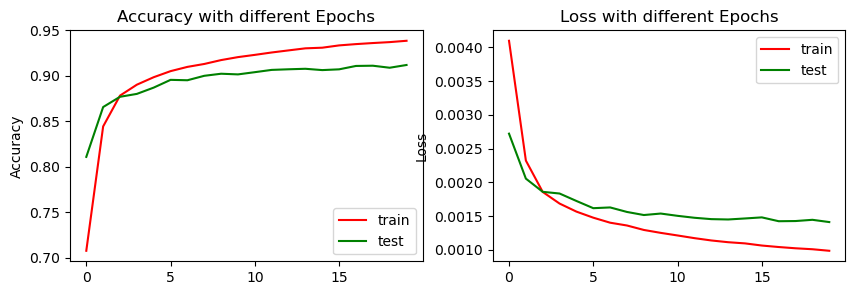

In [45]:
PlotResult(20)

### we change the cost function from categorical_crossentropy into mse. As we can see it has even better prediction result and every epochs training only cost 10s.

### PART D - EPOCHS (10 POINTS)

On your Deep Learning model data
Change the number of epochs initialization. How does it affect accuracy?
How quickly does the network plateau?

### Double epochs

In [22]:
#ModelDefinition
model = Sequential()
#model.add(Conv2D(128,(5,5)))
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_unique_chars, activation='softmax'))
opt = Adam()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 128)               65664     
                                                                 
 dense_14 (Dense)            (None, 32)                4128      
                                                                 
 dense_15 (Dense)            (None, 94)                3102      
                                                                 
Total params: 474,814
Trainable params: 474,814
Non-trainable params: 0
_________________________________________________________________


In [23]:
model_history=model.fit(X_train_norm, y_train_encoded, epochs=40, validation_data=(X_test_norm, y_test_encoded), verbose=2,batch_size=128)

Epoch 1/40


2022-11-20 19:30:30.075212: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-20 19:30:42.563806: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1714/1714 - 15s - loss: 0.8145 - accuracy: 0.7861 - val_loss: 0.5022 - val_accuracy: 0.8501 - 15s/epoch - 9ms/step
Epoch 2/40
1714/1714 - 15s - loss: 0.4374 - accuracy: 0.8647 - val_loss: 0.4212 - val_accuracy: 0.8710 - 15s/epoch - 9ms/step
Epoch 3/40
1714/1714 - 15s - loss: 0.3694 - accuracy: 0.8815 - val_loss: 0.3831 - val_accuracy: 0.8783 - 15s/epoch - 9ms/step
Epoch 4/40
1714/1714 - 15s - loss: 0.3246 - accuracy: 0.8932 - val_loss: 0.3769 - val_accuracy: 0.8802 - 15s/epoch - 9ms/step
Epoch 5/40
1714/1714 - 15s - loss: 0.2944 - accuracy: 0.9017 - val_loss: 0.3452 - val_accuracy: 0.8910 - 15s/epoch - 9ms/step
Epoch 6/40
1714/1714 - 15s - loss: 0.2665 - accuracy: 0.9096 - val_loss: 0.3413 - val_accuracy: 0.8939 - 15s/epoch - 9ms/step
Epoch 7/40
1714/1714 - 15s - loss: 0.2462 - accuracy: 0.9156 - val_loss: 0.3400 - val_accuracy: 0.8960 - 15s/epoch - 9ms/step
Epoch 8/40
1714/1714 - 15s - loss: 0.2279 - accuracy: 0.9212 - val_loss: 0.3334 - val_accuracy: 0.8991 - 15s/epoch - 9ms/step
Epo

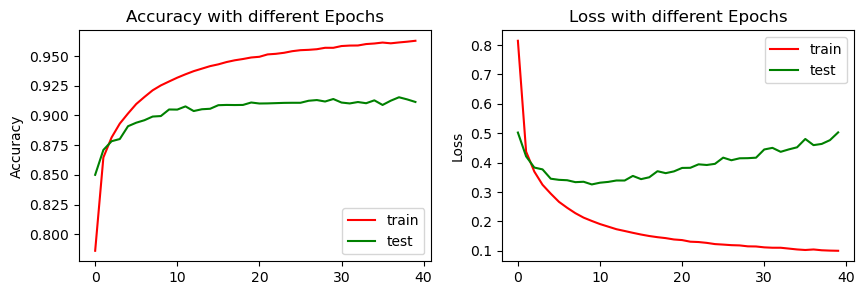

In [24]:
PlotResult(40)

### We double the dataset from 20 epochs to 40 echos. Use the same cost function and activation function. The time increased less than 2 times but the effect is worse.
### Half epochs

In [25]:
#ModelDefinition
model = Sequential()
#model.add(Conv2D(128,(5,5)))
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_unique_chars, activation='softmax'))
opt = Adam()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 512)               401920    
                                                                 
 dense_17 (Dense)            (None, 128)               65664     
                                                                 
 dense_18 (Dense)            (None, 32)                4128      
                                                                 
 dense_19 (Dense)            (None, 94)                3102      
                                                                 
Total params: 474,814
Trainable params: 474,814
Non-trainable params: 0
_________________________________________________________________


In [26]:
model_history=model.fit(X_train_norm, y_train_encoded, epochs=10, validation_data=(X_test_norm, y_test_encoded), verbose=2,batch_size=128)

Epoch 1/10


2022-11-20 19:40:21.867619: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-20 19:40:34.721876: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1714/1714 - 16s - loss: 0.7922 - accuracy: 0.7919 - val_loss: 0.5035 - val_accuracy: 0.8524 - 16s/epoch - 9ms/step
Epoch 2/10
1714/1714 - 15s - loss: 0.4395 - accuracy: 0.8652 - val_loss: 0.4106 - val_accuracy: 0.8746 - 15s/epoch - 9ms/step
Epoch 3/10
1714/1714 - 15s - loss: 0.3735 - accuracy: 0.8797 - val_loss: 0.3973 - val_accuracy: 0.8756 - 15s/epoch - 9ms/step
Epoch 4/10
1714/1714 - 15s - loss: 0.3304 - accuracy: 0.8912 - val_loss: 0.3708 - val_accuracy: 0.8822 - 15s/epoch - 9ms/step
Epoch 5/10
1714/1714 - 15s - loss: 0.2976 - accuracy: 0.9000 - val_loss: 0.3506 - val_accuracy: 0.8884 - 15s/epoch - 9ms/step
Epoch 6/10
1714/1714 - 15s - loss: 0.2701 - accuracy: 0.9082 - val_loss: 0.3454 - val_accuracy: 0.8936 - 15s/epoch - 9ms/step
Epoch 7/10
1714/1714 - 15s - loss: 0.2488 - accuracy: 0.9135 - val_loss: 0.3382 - val_accuracy: 0.8961 - 15s/epoch - 9ms/step
Epoch 8/10
1714/1714 - 15s - loss: 0.2304 - accuracy: 0.9201 - val_loss: 0.3274 - val_accuracy: 0.8974 - 15s/epoch - 9ms/step
Epo

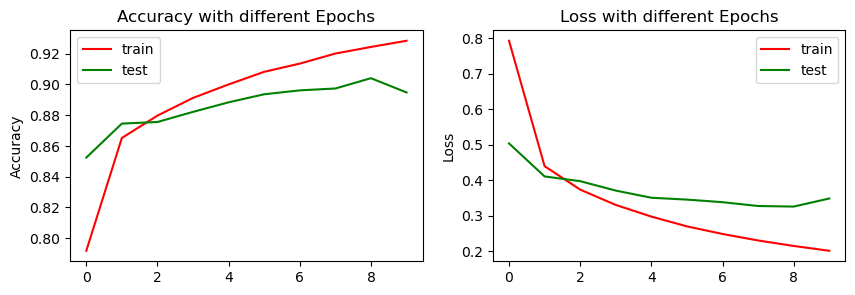

In [27]:
PlotResult(10)

### We half the dataset from 20 epochs to 10 echos. Use the same cost function and activation function. The time increased less than 2 times but the perfomance is better than 40 eoochs but still worse than 20 epochs. This means we need to choose the proper parameter. 

### PPART E - GRADIENT ESTIMATION (10 POINTS)
On your Deep Learning model

Change the gradient estimation. How does it affect accuracy? How does it affect how quickly the network plateaus?
Various forms of gradient estimation:
Stochastic Gradient Descent
Adagrad
RMSProp
ADAMN
AGAdadelta
Momentum

RMS prop is one of the popular optimizers among deep learning enthusiasts. This is maybe because it hasn’t been published but still very well know in the community. RMS prop is ideally an extension of the work RPPROP. RPPROP resolves the problem of varying gradients.

AdaDelta can be seen as a more robust version of AdaGrad optimizer. It is based upon adaptive learning and is designed to deal with significant drawbacks of AdaGrad and RMS prop optimizer. The main problem with the above two optimizers is that the initial learning rate must be defined manually.

The creators of the Adam optimization algorithm know the benefits of AdaGrad and RMSProp algorithms, which are also extensions of the stochastic gradient descent algorithms. Hence the Adam optimizers inherit the features of both Adagrad and RMS prop algorithms. In adam, instead of adapting learning rates based upon the first moment(mean) as in RMS Prop, it also uses the second moment of the gradients.

In this section, we will be experimenting with RMSProp and AdaDelta

In [28]:
#ModelDefinition
model = Sequential()
#model.add(Conv2D(128,(5,5)))
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_unique_chars, activation='softmax'))
opt = RMSprop()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 512)               401920    
                                                                 
 dense_21 (Dense)            (None, 128)               65664     
                                                                 
 dense_22 (Dense)            (None, 32)                4128      
                                                                 
 dense_23 (Dense)            (None, 94)                3102      
                                                                 
Total params: 474,814
Trainable params: 474,814
Non-trainable params: 0
_________________________________________________________________


In [29]:
model_history=model.fit(X_train_norm, y_train_encoded, epochs=20, validation_data=(X_test_norm, y_test_encoded), verbose=2,batch_size=128)

Epoch 1/20


2022-11-20 19:42:51.763296: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-20 19:43:05.991103: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1714/1714 - 17s - loss: 0.8107 - accuracy: 0.7849 - val_loss: 0.5320 - val_accuracy: 0.8384 - 17s/epoch - 10ms/step
Epoch 2/20
1714/1714 - 16s - loss: 0.4320 - accuracy: 0.8662 - val_loss: 0.4882 - val_accuracy: 0.8521 - 16s/epoch - 10ms/step
Epoch 3/20
1714/1714 - 16s - loss: 0.3663 - accuracy: 0.8833 - val_loss: 0.3745 - val_accuracy: 0.8851 - 16s/epoch - 9ms/step
Epoch 4/20
1714/1714 - 16s - loss: 0.3265 - accuracy: 0.8937 - val_loss: 0.3822 - val_accuracy: 0.8873 - 16s/epoch - 9ms/step
Epoch 5/20
1714/1714 - 16s - loss: 0.2978 - accuracy: 0.9022 - val_loss: 0.3661 - val_accuracy: 0.8920 - 16s/epoch - 9ms/step
Epoch 6/20
1714/1714 - 16s - loss: 0.2771 - accuracy: 0.9081 - val_loss: 0.3766 - val_accuracy: 0.8907 - 16s/epoch - 10ms/step
Epoch 7/20
1714/1714 - 16s - loss: 0.2600 - accuracy: 0.9137 - val_loss: 0.3850 - val_accuracy: 0.8888 - 16s/epoch - 9ms/step
Epoch 8/20
1714/1714 - 17s - loss: 0.2477 - accuracy: 0.9173 - val_loss: 0.3706 - val_accuracy: 0.8996 - 17s/epoch - 10ms/step

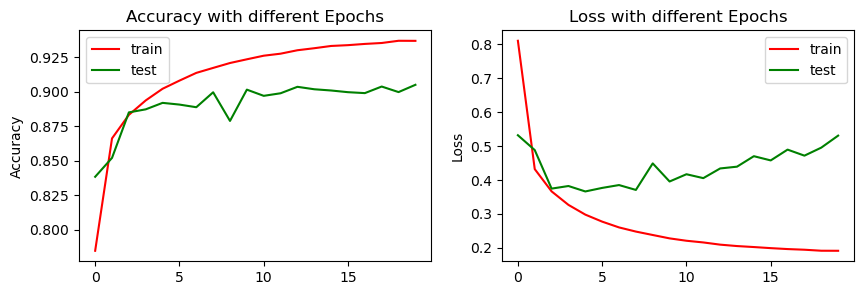

In [30]:
PlotResult(20)

### We Change the gradient estimation from Adam() to RMSprop(). The training time is about to be the same. The accuracy with epochs improved but the loss effect still bad.

In [31]:
#ModelDefinition
model = Sequential()
#model.add(Conv2D(128,(5,5)))
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_unique_chars, activation='softmax'))
opt = Adadelta()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 512)               401920    
                                                                 
 dense_25 (Dense)            (None, 128)               65664     
                                                                 
 dense_26 (Dense)            (None, 32)                4128      
                                                                 
 dense_27 (Dense)            (None, 94)                3102      
                                                                 
Total params: 474,814
Trainable params: 474,814
Non-trainable params: 0
_________________________________________________________________


In [33]:
model_history=model.fit(X_train_norm, y_train_encoded, epochs=20, validation_data=(X_test_norm, y_test_encoded), verbose=2,batch_size=128)

Epoch 1/20
1714/1714 - 14s - loss: 4.2382 - accuracy: 0.1124 - val_loss: 4.2018 - val_accuracy: 0.1187 - 14s/epoch - 8ms/step
Epoch 2/20
1714/1714 - 14s - loss: 4.1657 - accuracy: 0.1273 - val_loss: 4.1272 - val_accuracy: 0.1326 - 14s/epoch - 8ms/step
Epoch 3/20
1714/1714 - 14s - loss: 4.0892 - accuracy: 0.1408 - val_loss: 4.0492 - val_accuracy: 0.1464 - 14s/epoch - 8ms/step
Epoch 4/20
1714/1714 - 14s - loss: 4.0096 - accuracy: 0.1541 - val_loss: 3.9682 - val_accuracy: 0.1600 - 14s/epoch - 8ms/step
Epoch 5/20
1714/1714 - 14s - loss: 3.9266 - accuracy: 0.1679 - val_loss: 3.8836 - val_accuracy: 0.1744 - 14s/epoch - 8ms/step
Epoch 6/20
1714/1714 - 14s - loss: 3.8407 - accuracy: 0.1832 - val_loss: 3.7968 - val_accuracy: 0.1917 - 14s/epoch - 8ms/step
Epoch 7/20
1714/1714 - 14s - loss: 3.7527 - accuracy: 0.2025 - val_loss: 3.7080 - val_accuracy: 0.2123 - 14s/epoch - 8ms/step
Epoch 8/20
1714/1714 - 14s - loss: 3.6634 - accuracy: 0.2222 - val_loss: 3.6183 - val_accuracy: 0.2311 - 14s/epoch - 8

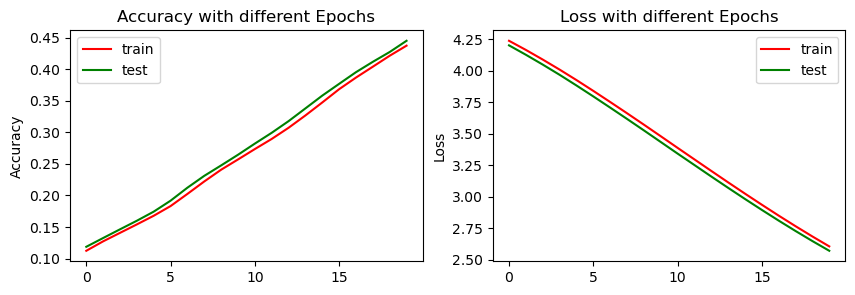

In [34]:
PlotResult(20)

### We Change the gradient estimation from Adam() to Adadelta(). The training time is about to be the same. The accuracy and loss with epochs seems over trained ove the process.

### PART F - NETWORK ARCHITECTURE (10 POINTS)

On your Deep Learning model change the network architecture. How does it affect accuracy? How does it affect how quickly the network plateaus?
Various forms of network architecture:
Number of layers
Size of each layer
Connection type


Here, we are changing the baseline network architecture by adding 2 x conv2D layers and 2x MaxPooling layers followed by one flattened layer and 3 x dense layers.

We have the same actication functions, cost functions and gradient estimators as the baseline and we can observe that this new architecture performs slightly better than the baseline by giving an accuracy of 0.9492 and a loss of 0.1423



In [35]:
cnn_model = Sequential()
cnn_model.add(Conv2D(128, (5, 5), activation='relu', input_shape=(28, 28,1)))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dense(num_unique_chars, activation='softmax'))
opt = Adam()
cnn_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 128)       3328      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 1600)              0         
                                                                 
 dense_28 (Dense)            (None, 64)               

In [36]:
#normalizing data for CNN model
X_train_norm=X_train_norm.reshape((X_train_norm.shape[0],28,28,1))
X_test_norm=X_test_norm.reshape((X_test_norm.shape[0],28,28,1))

In [37]:
model_history=cnn_model.fit(X_train_norm, y_train_encoded, epochs=20, validation_data=(X_test_norm, y_test_encoded), verbose=2,batch_size=128)

Epoch 1/20


2022-11-20 19:55:07.163841: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-20 19:55:34.879253: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1714/1714 - 31s - loss: 0.7804 - accuracy: 0.7900 - val_loss: 0.4150 - val_accuracy: 0.8766 - 31s/epoch - 18ms/step
Epoch 2/20
1714/1714 - 29s - loss: 0.3579 - accuracy: 0.8916 - val_loss: 0.3206 - val_accuracy: 0.9041 - 29s/epoch - 17ms/step
Epoch 3/20
1714/1714 - 29s - loss: 0.2842 - accuracy: 0.9130 - val_loss: 0.2884 - val_accuracy: 0.9135 - 29s/epoch - 17ms/step
Epoch 4/20
1714/1714 - 29s - loss: 0.2468 - accuracy: 0.9227 - val_loss: 0.2465 - val_accuracy: 0.9233 - 29s/epoch - 17ms/step
Epoch 5/20
1714/1714 - 29s - loss: 0.2217 - accuracy: 0.9290 - val_loss: 0.2599 - val_accuracy: 0.9192 - 29s/epoch - 17ms/step
Epoch 6/20
1714/1714 - 29s - loss: 0.2025 - accuracy: 0.9340 - val_loss: 0.2372 - val_accuracy: 0.9273 - 29s/epoch - 17ms/step
Epoch 7/20
1714/1714 - 29s - loss: 0.1889 - accuracy: 0.9374 - val_loss: 0.2170 - val_accuracy: 0.9330 - 29s/epoch - 17ms/step
Epoch 8/20
1714/1714 - 29s - loss: 0.1755 - accuracy: 0.9409 - val_loss: 0.2142 - val_accuracy: 0.9339 - 29s/epoch - 17ms/

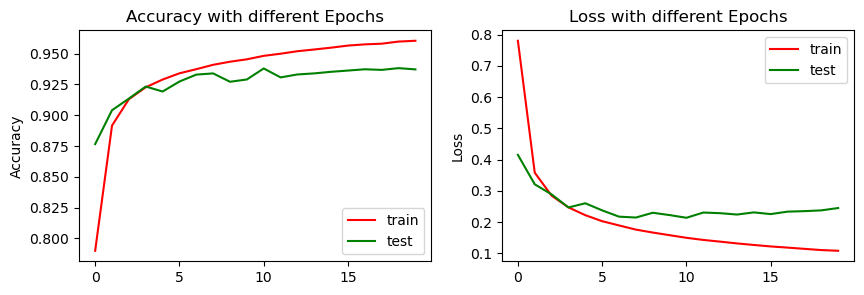

In [38]:
PlotResult(20)

### The result shows that the training time is doubled but the model effect is good with in half the epochs  and become large only after 12 epochs.

### PART G - NETWORK INITIALIZATION (10 POINTS)
On your Deep Learning model

Change the network initialization. How does it affect accuracy? How does it affect how quickly the network plateaus?

Xavier Initialization keeps the variance the same across every layer. We will assume that our layer’s activations are normally distributed around zero. Sometimes it helps to understand the mathematical justification to grasp the concept, but you can understand the fundamental idea without the math.

In our baseline model, the initializer is glorot uniform. We will be experimenting with Glorot Normal which is also known as Xavier Normal Initializer.

In [39]:
initializer = tf.keras.initializers.GlorotNormal()

In [40]:
#ModelDefinition
model = Sequential()
#model.add(Conv2D(128,(5,5)))
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512,activation='relu',kernel_initializer = initializer))
model.add(Dense(128,activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_unique_chars, activation='softmax'))
opt = Adam()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_31 (Dense)            (None, 512)               401920    
                                                                 
 dense_32 (Dense)            (None, 128)               65664     
                                                                 
 dense_33 (Dense)            (None, 32)                4128      
                                                                 
 dense_34 (Dense)            (None, 94)                3102      
                                                                 
Total params: 474,814
Trainable params: 474,814
Non-trainable params: 0
_________________________________________________________________


In [41]:
model_history=model.fit(X_train_norm, y_train_encoded, epochs=20, validation_data=(X_test_norm, y_test_encoded), verbose=2,batch_size=128)

Epoch 1/20


2022-11-20 20:45:42.873843: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-20 20:45:55.737415: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1714/1714 - 16s - loss: 0.8098 - accuracy: 0.7873 - val_loss: 0.5238 - val_accuracy: 0.8434 - 16s/epoch - 9ms/step
Epoch 2/20
1714/1714 - 15s - loss: 0.4391 - accuracy: 0.8650 - val_loss: 0.4164 - val_accuracy: 0.8718 - 15s/epoch - 9ms/step
Epoch 3/20
1714/1714 - 15s - loss: 0.3710 - accuracy: 0.8806 - val_loss: 0.3840 - val_accuracy: 0.8807 - 15s/epoch - 9ms/step
Epoch 4/20
1714/1714 - 15s - loss: 0.3274 - accuracy: 0.8920 - val_loss: 0.3744 - val_accuracy: 0.8816 - 15s/epoch - 9ms/step
Epoch 5/20
1714/1714 - 17s - loss: 0.2946 - accuracy: 0.9011 - val_loss: 0.3489 - val_accuracy: 0.8903 - 17s/epoch - 10ms/step
Epoch 6/20
1714/1714 - 15s - loss: 0.2679 - accuracy: 0.9085 - val_loss: 0.3357 - val_accuracy: 0.8996 - 15s/epoch - 9ms/step
Epoch 7/20
1714/1714 - 15s - loss: 0.2455 - accuracy: 0.9149 - val_loss: 0.3315 - val_accuracy: 0.9005 - 15s/epoch - 9ms/step
Epoch 8/20
1714/1714 - 15s - loss: 0.2285 - accuracy: 0.9201 - val_loss: 0.3232 - val_accuracy: 0.9024 - 15s/epoch - 9ms/step
Ep

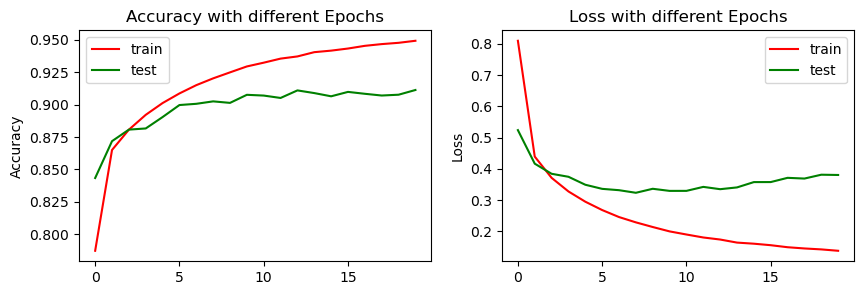

In [42]:
PlotResult(20)

### The initialize process doesn't change a lot of the model and optimize result.

### References  
use the code from the kaggle website and change some parameters   
1、Dataset: https://www.kaggle.com/datasets/nikbearbrown/tmnist-alphabet-94-characters

2、CNN Implementation: https://www.kaggle.com/code/nikbearbrown/tmnist-cnn-starter/data?scriptVersionId=98117660

3、CNN Implementation: https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/

4、CNN Implementation: https://www.kaggle.com/datasets/nimishmagre/tmnist-typeface-mnist

5、Cost Function: https://vitalflux.com/mean-squared-error-vs-cross-entropy-loss-function/#:~:text=Mean%20squared%20error%20(MSE)%20loss%20is%20calculated%20by%20taking%20the,will%20be%20our%20final%20result.
6、Activation Functions: https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6